<a href="https://colab.research.google.com/github/StarostinaLV/Netology_HW/blob/main/HW2_DS_Menegement_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание**

1. Выполните задание по ссылке и оформите в виде CRISP-DM подхода.
2. Структурируйте код, отчёт и файлы с данными на основе сегодняшней лекции.
3. Загрузите решение в Git и пришлите ссылку на ваш репозиторий.

Дополнительное задание*

Попробуйте не загружать CSV-файл с данными, а сделайте отдельный скрипт на его получение.

#**1. Business Understanding**

**Цель работы с датасетом** - определить класс качества вина по его физикохимическому составу.
Таким образом, признаками являются физикохимические свойства, целевой переменной - класс качества вина.

**Ограничения и предположения.**
Классы не сбалансированы. Кроме того, нет  уверенности, что все признаки могут быть полезными для определения таргета, поэтому может понадобиться отбор признаков. Задача может быть решена с помощью алгоритмов классификации или регрессии.

**Критерии успеха:** значние метрики качества.

# **2. Data Understanding**

**Описание данных.**

Признаки (по результатам физикохимических тестов):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Целевая переменная - класс качества вина (от 0 до 10):

12 - quality

**Выбор модели и способа оценки качества ее работы.**

Т.к. целевая переменная может принимать несколько значений (от 0 до 10), в качестве алгоритма классификации выберем RandomForestClassifier.

Для оценки качества модели воспользуемся метрикой f1_score, т.к. она менее чувствительна к дисбалансу классов.

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score

In [465]:
# Функция для подсчета метрики качества:

def get_score(X, y, random_seed=42):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
    model = RandomForestClassifier(random_state=random_seed)
    model.fit(X_train, y_train)
    # skf = StratifiedKFold()
    # scores_test = cross_val_score(model, X_test, y_test, cv=skf, )
    f1_sc = f1_score(y_test, model.predict(X_test), average='weighted')

    return print(f'f1_score {f1_sc.round(4)}')

In [466]:
df = pd.read_csv("winequalityN.csv")

In [467]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [468]:
# Информация о датасете:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Тип вина (type) - категориальный признак, остальные - числовые.

In [469]:
# Уникальные значения типов вин в датасете:
df.type.unique()

array(['white', 'red'], dtype=object)

В датасете имеются пропущенные значения, их количество для каждого признака:

In [470]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Преобразуем категориальную переменную в числовую с помощью get_dummies и удалим пропуски:

In [471]:
df = pd.get_dummies(df, columns=['type'])

In [472]:
df.dropna(inplace=True)

In [473]:
df.shape

(6463, 14)

In [474]:
df[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1


In [475]:
# Основные статистики:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505,0.246480,0.753520
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286,0.430995,0.430995
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


С помощью функции get_score подсчитаем метрику качества на "сырых" данных, чтобы далее от нее отталкиваться.

In [476]:
# Названия колонок датасета:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_red', 'type_white'],
      dtype='object')

In [477]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type_red', 'type_white']

get_score(df[cols], df.quality)

f1_score 0.6528


# **3. Data Preparation**

Сформируем датасет с признаками и серию с целевой переменной.

In [478]:
# Признаки:
X = df.drop(['quality'], axis=1)

In [479]:
# Таргет:
y = df.quality

Для выявления выбросов воспользуемся диаграммами boxplot (т.к. базовые статистики выше малоинформативны для неспециалиста).

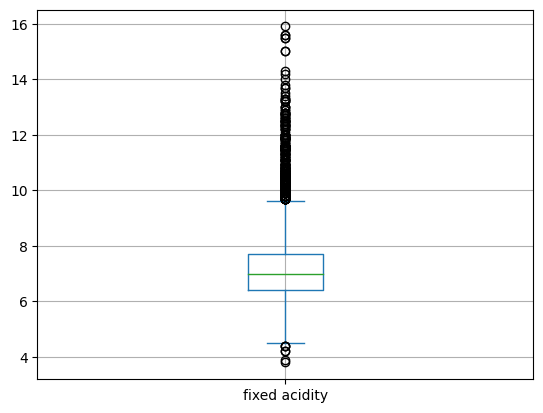

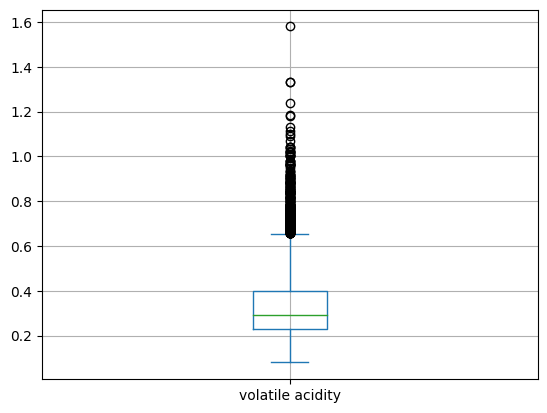

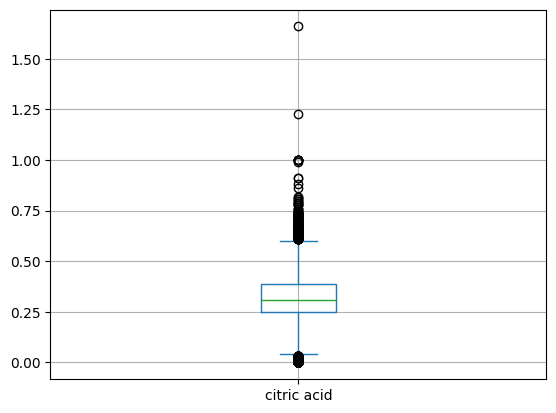

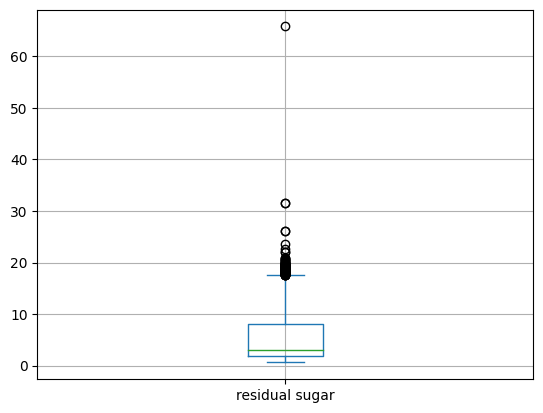

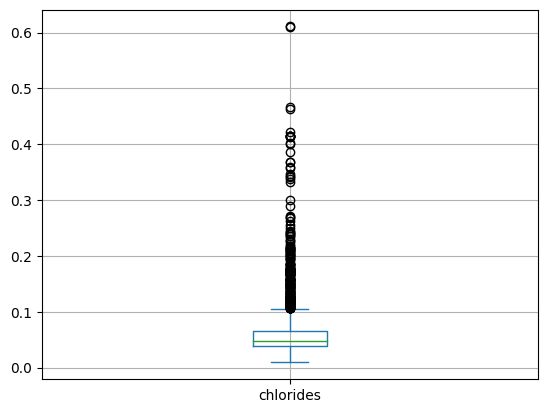

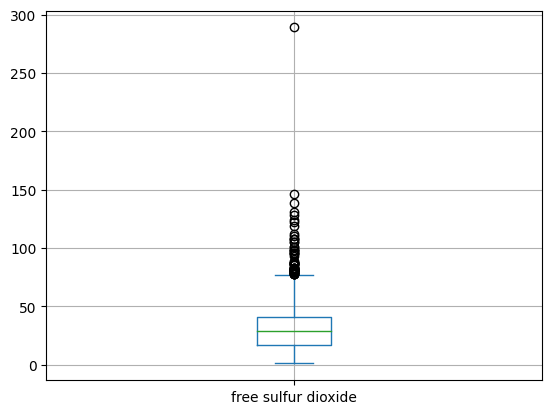

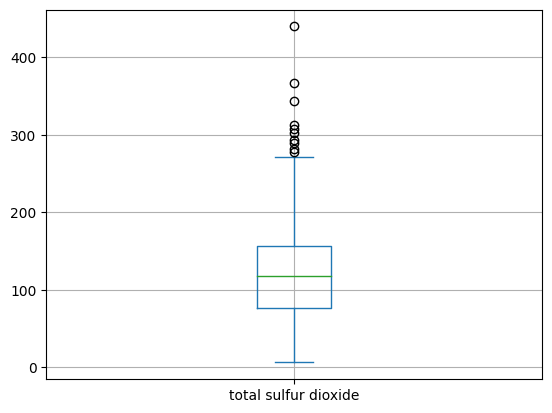

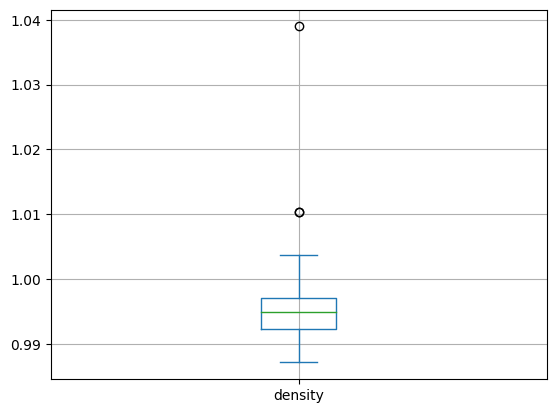

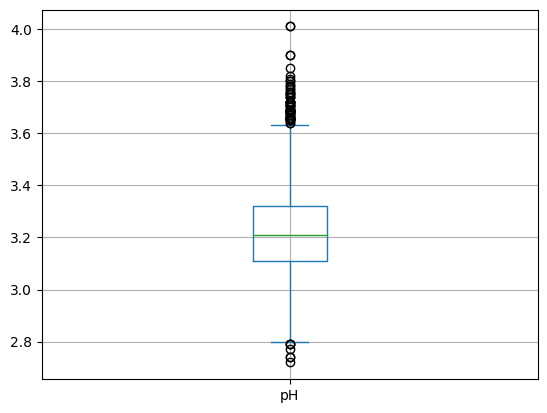

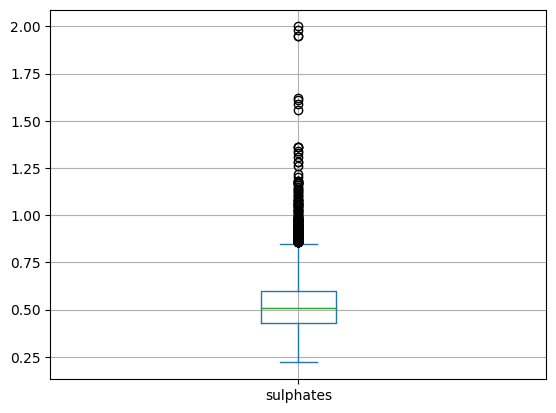

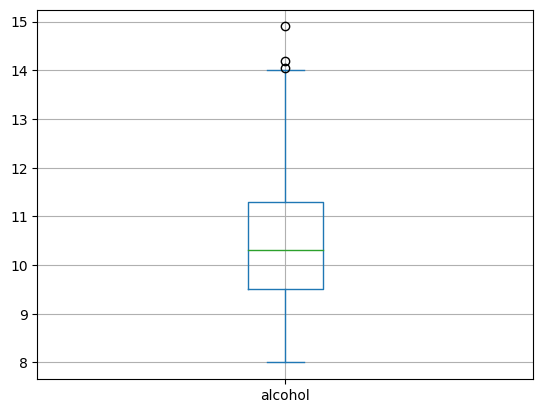

In [480]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for column in columns:
  df[column].plot(kind='box', grid=True)
  plt.show()

Потенциальные выбросы имеются в наборе каждого признака.

Исследуем признаки на выбросы в цикле методами OneClassSVM и EllipticEnvelope библиотеки sklearn, полученные данные сведем в таблицу.

In [481]:
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

In [482]:
classifiers = {
    "OneClassSVM": OneClassSVM(nu=0.1),
    "EllipticEnvelope": EllipticEnvelope(contamination=0.2),
    }

df_outliers=pd.DataFrame(columns=classifiers.keys())
for (el_name, el) in classifiers.items():
  el.fit(X)
  el.predict(X)
  df_outliers[el_name]=el.predict(X)
df_outliers

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-74.362192670159743 > -74.427252658798409). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(


,OneClassSVM,EllipticEnvelope
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
6458,1,-1
6459,1,-1
6460,1,-1
6461,1,-1


В полученную таблицу добавим столбец с суммой построчно, отсортируем таблицу по возрастанию значений в новом столбце. Таким образом увидим строки (объекты) с самым большим количеством выбросов.

In [483]:
df_outliers['Sum'] = df_outliers[['OneClassSVM',	'EllipticEnvelope']].sum(axis=1)
df_outliers.sort_values(by=['Sum'], ascending=True)[:10]

,OneClassSVM,EllipticEnvelope,Sum
5365,-1,-1,-2
5206,-1,-1,-2
5199,-1,-1,-2
5197,-1,-1,-2
5947,-1,-1,-2
5948,-1,-1,-2
5196,-1,-1,-2
5956,-1,-1,-2
5962,-1,-1,-2
5964,-1,-1,-2


В колонке 'Sum' таблицы df_outliers значения тем меньше, чем больше моделей посчитало данный объект выбросом.

In [484]:
df_outliers.Sum.unique()

array([ 2,  0, -2])

Удалим из датасета X те строки, для которых значения 'Sum'=-2 в датафрейме df_outliers (т.е. обе модели - OneClassSVM и	EllipticEnvelope посчитали значения в данных строках выбросами).

In [485]:
df_outliers_all = df_outliers[df_outliers.Sum==-2] # Подсчёт количества объектов-выбросов

print(f'Количество выбросов = {df_outliers_all.shape[0]} ({df_outliers_all.shape[0] * 100 / df.shape[0]:.2f}% от общего числа объектов)')

outliers_list = df_outliers_all.index.tolist() # Индексы строк с выбросами

df_new = df.drop(index=outliers_list) # Исходный датафрейм без выбросов

  # Массив признаков и серия с целевой переменной:
X_new = df_new.drop(columns=['quality'])
y_new = df_new.quality

get_score(X_new, y_new)

Количество выбросов = 250 (3.87% от общего числа объектов)
f1_score 0.6548


Качество классификации вин немного увеличилось.

Построим матрицу корреляции для выявления коррелирующих с целевой переменной признаков.

In [486]:
# Матрица корреляции:
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
fixed acidity,1.000000,0.217085,0.308506,-0.098767,0.284640,-0.266623,-0.302654,0.442853,-0.256039,0.282657,-0.102077,-0.091268,0.472855,-0.472855
volatile acidity,0.217085,1.000000,-0.371889,-0.182960,0.371035,-0.344423,-0.401031,0.260183,0.247887,0.218058,-0.035178,-0.269512,0.651938,-0.651938
citric acid,0.308506,-0.371889,1.000000,0.142194,0.037103,0.138482,0.203222,0.093911,-0.315513,0.053368,-0.016107,0.079572,-0.194737,0.194737
residual sugar,-0.098767,-0.182960,0.142194,1.000000,-0.117615,0.396309,0.488149,0.579366,-0.260778,-0.171947,-0.365680,-0.034061,-0.332112,0.332112
chlorides,0.284640,0.371035,0.037103,-0.117615,1.000000,-0.177849,-0.256895,0.353432,0.041373,0.383771,-0.265556,-0.211304,0.502597,-0.502597
free sulfur dioxide,-0.266623,-0.344423,0.138482,0.396309,-0.177849,1.000000,0.714198,0.050547,-0.137425,-0.171736,-0.182813,0.060145,-0.453681,0.453681
total sulfur dioxide,-0.302654,-0.401031,0.203222,0.488149,-0.256895,0.714198,1.000000,0.068953,-0.226620,-0.249993,-0.272286,-0.037497,-0.680471,0.680471
density,0.442853,0.260183,0.093911,0.579366,0.353432,0.050547,0.068953,1.000000,0.006635,0.247576,-0.698208,-0.310454,0.372598,-0.372598
pH,-0.256039,0.247887,-0.315513,-0.260778,0.041373,-0.137425,-0.226620,0.006635,1.000000,0.188851,0.121738,0.025018,0.319914,-0.319914
sulphates,0.282657,0.218058,0.053368,-0.171947,0.383771,-0.171736,-0.249993,0.247576,0.188851,1.000000,-0.011759,0.029894,0.469760,-0.469760


Сильнее остальных с классом вина коррелируют следующие признаки: 'alcohol',  'density', 'volatile acidity', 'chlorides', 'type_red', 'type_white'.


Проверим метрику качества, если оставить только перечисленные выше признаки (за исключением 'type_white', т.к. информация о нем косвенно содержится в 'type_red').

In [487]:
get_score(X_new[['alcohol',  'density', 'volatile acidity', 'chlorides', 'type_red']], y_new)

f1_score 0.6096


Попробуем отобрать более информативные признаки методом VarianceThreshold библиотеки sklearn.

In [488]:
from sklearn.feature_selection import VarianceThreshold

In [489]:
selector_VTh = VarianceThreshold(threshold=0.5)
X_VTh = pd.DataFrame(selector_VTh.fit_transform(X_new))
X_VTh[:3]

,0,1,2,3,4
0,7.0,20.7,45.0,170.0,8.8
1,6.3,1.6,14.0,132.0,9.5
2,8.1,6.9,30.0,97.0,10.1


In [490]:
get_score(X_VTh, y_new)

f1_score 0.6203


In [491]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [492]:
selector_KB = SelectKBest(f_classif, k=12)
X_KB = pd.DataFrame(selector_KB.fit_transform(X_new, y_new))
X_KB[:3]

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,0.0,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0.0,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0.0,1.0


In [493]:
get_score(X_KB, y_new)

f1_score 0.6555


**Попытки отбора признаков с помощью матрицы корреляции, а также инструментов VarianceThreshold и SelectKBest библиотеки sklearn заметного улучшения метрики качества не дали.**

**Далее продолжим работу с полным набором признаков после удаления выбросов (датафрейм X_new).**

#**4. Modeling&Evaluation**

Попробуем улучшить метрику, используя стекинг и бустинг.

In [494]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

## Стекинг

In [495]:
from sklearn.ensemble import StackingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [496]:
Classifier = StackingClassifier(
    [   ('SVC', SVC()),
        ('KNeighborsRegressor', KNeighborsClassifier()),
        ('DecisionTree', DecisionTreeClassifier())
    ], RandomForestClassifier())

In [497]:
Classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


StackingClassifier(estimators=[('SVC', SVC()),
                               ('KNeighborsRegressor', KNeighborsClassifier()),
                               ('DecisionTree', DecisionTreeClassifier())],
                   final_estimator=RandomForestClassifier())

In [498]:
f1_score(y_test, Classifier.predict(X_test), average='weighted')

0.5768804613253288

## Бустинг

In [499]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(n_estimators=200, random_state=42)

In [500]:
boosting.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [501]:
f1_score(y_test, boosting.predict(X_test), average='weighted')

0.5673619206417462

Бустинг и стекинг увеличения метрики качества не дали, по-прежнему лучшее значение метрики дал алгоритм "Случайный лес" после удаления выбросов.

Попробуем повысить метрику "Случайного леса" за счет настройки его параметров с помощью кросс-валидации (инструмент GridSearchCV библиотеки sklearn).

In [502]:
model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [503]:
f1_score(y_test, model_forest.predict(X_test), average='weighted')

0.6547975442440688

In [506]:
from sklearn.model_selection import GridSearchCV

In [507]:
%time
# Оптимизируемые параметры и диапазоны их значений, из которых будут выбраны оптимальные:
optim_param = {'max_depth':range(1,20), 'criterion':["gini", "entropy", "log_loss"], 'max_features':["sqrt", "log2", None]}

# Задание параметров кросс-валидации:
tree_grid = GridSearchCV(model_forest, optim_param, cv=3, n_jobs=-1, verbose=True, )

tree_grid.fit(X_train, y_train)

tree_grid.best_params_

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Fitting 3 folds for each of 171 candidates, totalling 513 fits


{'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt'}

In [508]:
# Модель с оптимальными параметрами и ее метрика:
model_forest_opt = RandomForestClassifier(max_depth=tree_grid.best_params_['max_depth'],
                                          criterion=tree_grid.best_params_['criterion'],
                                          max_features=tree_grid.best_params_['max_features'],
                                          random_state=42)
model_forest_opt.fit(X_train, y_train)
model_forest_opt.predict(X_test)
# Метрика:
acc_forest_opt = f1_score(y_test, model_forest_opt.predict(X_test), average='weighted')
acc_forest_opt

0.6584096804707025

Лучшее значение метрикики 0,6584.

In [510]:
# Предсказания модели:
prediction = model_forest_opt.predict(X_test)
prediction

array([5, 5, 5, ..., 6, 5, 5])

#**5. Deployment**

Сведем предсказанные моделью классы вина и истинные значения (для тестовой выборки) в единиы датафрейм.

In [513]:
df_results = pd.DataFrame({'true_quality':y_test, 'prediction': prediction})
df_results

,true_quality,prediction
4610,6,5
2304,6,5
5458,5,5
3389,7,6
173,7,6
...,...,...
5171,5,5
4702,6,6
2686,6,6
615,5,5


Датафрейм сохраним в виде csv-файла.

In [515]:
df_results.to_csv('wine_quality_prediction.csv', index=False)